In [1]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random
import tensorflow as tf
from keras import models, layers

In [2]:
audio_data_path = r'C:./set1/train'

In [3]:
#파라미터 설정
sr = 16000
n_mfcc = 116
# n_ttf = 
# hop_length

In [4]:
trainset = []

In [5]:
label_mapping = {'belly_pain': 0, 'discomfort': 1, 'hungry': 2, 'tired': 3}

In [6]:
# 목표로 하는 패딩 크기
target_size = (116, 116)

# 폴더 내의 파일을 반복하여 데이터셋에 추가
for class_name in label_mapping.keys():
    class_path = os.path.join(audio_data_path, class_name)
    
    # 클래스 폴더 내의 WAV 파일에 대해 루프 수행
    for filename in os.listdir(class_path):
        if filename.endswith(".wav"):
            try:
                # WAV 파일 읽기
                wav_path = os.path.join(class_path, filename)
                wav, sr = librosa.load(wav_path, sr=None, mono=True, duration=5.0)
                
                # MFCC 추출
                mfcc = librosa.feature.mfcc(y=wav, sr=sr, n_mfcc=n_mfcc)
                
                # 패딩 또는 자르기 작업
                if mfcc.shape[1] > target_size[1]:
                    # 자르기
                    padded_mfcc = mfcc[:, :target_size[1]]
                else:
                    # 패딩
                    pad_width = target_size[1] - mfcc.shape[1]
                    padded_mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                
                # 라벨 할당
                label = label_mapping[class_name]
                
                # 데이터와 라벨을 trainset에 추가
                trainset.append((padded_mfcc, label))
                
            except Exception as e:
                print(f'Error processing {filename}: {e}')

In [7]:
# 패딩된 MFCC 배열 확인
for padded_mfcc, label in trainset:
    print(f'MFCC 크기: {padded_mfcc.shape}, 라벨: {label}')

MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
MFCC 크기: (116, 116), 라벨: 0
M

In [8]:
len(trainset)

332

In [9]:
trainset[0][1]

0

In [10]:
trainset_np = np.array(trainset, dtype=object)

In [11]:
trainset_np.shape

(332, 2)

In [12]:
from sklearn.model_selection import train_test_split

# trainset을 데이터와 라벨로 나누기
X = np.array([item[0] for item in trainset])
y = np.array([item[1] for item in trainset])

# 훈련 세트와 테스트 세트로 나누기 (예: 훈련 세트 80%, 테스트 세트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)

# 결과 확인
print(f"훈련 세트 크기: {X_train.shape}, 라벨 크기: {y_train.shape}")
print(f"테스트 세트 크기: {X_test.shape}, 라벨 크기: {y_test.shape}")


훈련 세트 크기: (265, 116, 116), 라벨 크기: (265,)
테스트 세트 크기: (67, 116, 116), 라벨 크기: (67,)


In [13]:
# X_train의 차원을 (샘플 수, 98, 98, 1)로 조정
X_train_dim = X_train.reshape(X_train.shape + (1,))
X_test_dim = X_test.reshape(X_test.shape + (1,))

In [14]:
X_train_dim[0].shape

(116, 116, 1)

In [15]:
inputs = layers.Input(shape= X_train_dim[0].shape)



# Contracting path 시작
# [1]
conv0 = layers.Conv2D(8, activation='relu', kernel_size = 3)(inputs) # 116 - 114
conv1 = layers.Conv2D(8, activation='relu', kernel_size = 3)(conv0)  # Skip connection으로 Expanding path로 이어질 예정, 112
conv2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv1) # 56


# [2]
conv3 = layers.Conv2D(16, activation='relu', kernel_size = 3)(conv2) # 56 - 54
conv4 = layers.Conv2D(16, activation='relu', kernel_size = 3)(conv3) # 52
conv5 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv4) #26


# [3]
conv6 = layers.Conv2D(32, activation='relu', kernel_size=3)(conv5) # 26 - 24
conv7 = layers.Conv2D(32, activation='relu', kernel_size=3)(conv6) # 22
# Contracting path 끝

# Expanding path 시작
# [6]
trans01 = layers.Conv2DTranspose(16, kernel_size=2, strides=(2, 2), activation='relu')(conv7) # 44
crop01 = layers.Cropping2D(cropping=(4, 4))(conv4) 
concat01 = layers.concatenate([trans01, crop01], axis=-1) # 44 & 52


# Q.위 이미지를 보고 [11]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv8 = layers.Conv2D(16, activation='relu', kernel_size=3)(concat01) # 44 - 42
conv9 = layers.Conv2D(16, activation='relu', kernel_size=3)(conv8)  # 40
trans02 = layers.Conv2DTranspose(8, kernel_size=2, strides=(2, 2), activation='relu')(conv9)


# Q.위 이미지를 보고 [12]번 블럭을 구현해 봅시다. 
crop02 = layers.Cropping2D(cropping=(16, 16))(conv1) # 80 & 112
concat02 = layers.concatenate([trans02, crop02], axis=-1)


# [13]
conv10 = layers.Conv2D(8, activation='relu', kernel_size=3)(concat02) # 80 - 78 - 76
conv11 = layers.Conv2D(8, activation='relu', kernel_size=3)(conv10)
# Expanding path 끝

full01 = layers.Flatten()(conv11)
dense01 = layers.Dense(2048, activation='relu')(full01)
batch01 = layers.BatchNormalization()(dense01)
drop01 = layers.Dropout(0.3)(batch01)

dense02 = layers.Dense(512, activation='relu')(drop01)
batch02 = layers.BatchNormalization()(dense02)
drop02 = layers.Dropout(0.3)(dense02)



out_layer = layers.Dense(4, activation='softmax')(dense02)



model = tf.keras.Model(inputs=inputs, outputs=out_layer)



model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 116, 116, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 114, 114, 8)  80          ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 112, 112, 8)  584         ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 8)    0           ['conv2d_1[0][0]']           

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train_dim, y_train, epochs=25,  validation_data = (X_test_dim, y_test))

Epoch 1/25
9/9 [==============================] - 4s 132ms/step - loss: 2.1943 - accuracy: 0.3774 - val_loss: 18.2782 - val_accuracy: 0.1343
Epoch 2/25
9/9 [==============================] - 0s 37ms/step - loss: 1.0545 - accuracy: 0.6943 - val_loss: 18.6294 - val_accuracy: 0.2388
Epoch 3/25
9/9 [==============================] - 0s 38ms/step - loss: 0.3926 - accuracy: 0.8717 - val_loss: 5.4988 - val_accuracy: 0.3881
Epoch 4/25
9/9 [==============================] - 0s 37ms/step - loss: 0.1162 - accuracy: 0.9736 - val_loss: 3.4475 - val_accuracy: 0.3881
Epoch 5/25
9/9 [==============================] - 0s 37ms/step - loss: 0.1150 - accuracy: 0.9736 - val_loss: 4.0689 - val_accuracy: 0.4030
Epoch 6/25
9/9 [==============================] - 0s 37ms/step - loss: 0.0171 - accuracy: 0.9925 - val_loss: 6.3431 - val_accuracy: 0.4179
Epoch 7/25
9/9 [==============================] - 0s 37ms/step - loss: 0.0238 - accuracy: 0.9962 - val_loss: 5.0169 - val_accuracy: 0.4478
Epoch 8/25
9/9 [========

C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_3552\237002889.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


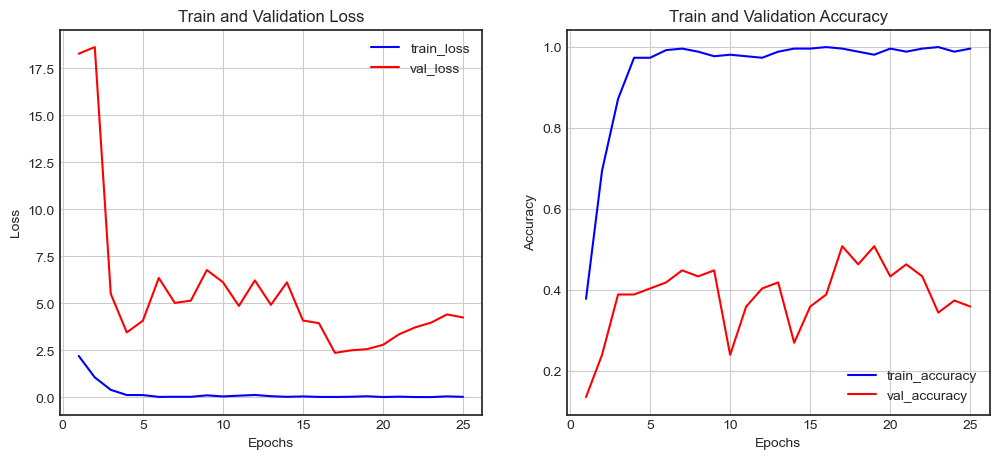

In [18]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [19]:
model.evaluate(X_test_dim, y_test)

3/3 [==============================] - 0s 7ms/step - loss: 4.2425 - accuracy: 0.3582


[4.242538928985596, 0.35820895433425903]